<a href="https://colab.research.google.com/github/nazimurhman/house-price-prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Description:**

The dataset contains information about properties. Each property has a unique property ID and is associated with a location ID based on the subcategory of the city.

In [2]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/jillanisofttech/pakistan-house-price-dataset")

Skipping, found downloaded files in "./pakistan-house-price-dataset" (use force=True to force download)


In [132]:
# Core Python Libraries
import warnings  # To suppress unnecessary warnings during execution
warnings.filterwarnings('ignore')  # Ignore all warnings globally
import time
from scipy import stats

# Data Manipulation
import numpy as np  # Numerical computing, arrays, linear algebra, stats
import pandas as pd  # Powerful data manipulation and analysis library

# Visualization
import matplotlib.pyplot as plt  # General plotting library
import seaborn as sns  # Statistical plotting built on top of matplotlib

# Scikit-learn - Model Selection
from sklearn.model_selection import (
    train_test_split,  # Split arrays into training and test subsets
    GridSearchCV,  # Exhaustive search over hyperparameters
    RandomizedSearchCV,  # Randomized parameter search for faster tuning
    cross_val_score,  # Evaluate a score by cross-validation
    cross_val_predict,  # Generate cross-validated estimates for each input
    learning_curve,  # Generate learning curves for training and validation performance
    KFold  # K-Folds cross-validator for splitting data
)

# Scikit-learn - Metrics
from sklearn.metrics import (
    mean_squared_error,  # Regression loss metric: Mean Squared Error
    r2_score,  # Regression score function (Coefficient of Determination)
    mean_absolute_error,  # Mean Absolute Error metric
    explained_variance_score,  # Measures the proportion of variance explained
    make_scorer  # Converts a metric function into a scorer for model evaluation
)

# Scikit-learn - Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet # Linear  models

# Specialized ML Libraries
from xgboost import XGBRegressor

> **Data Preprocessing**

In [68]:
# Data Loading
data = pd.read_csv('/content/pakistan-house-price-dataset/zameen-updated.csv')

In [69]:
# Data Shape Overview
print(f'The Number of Rows in a Dataset is {data.shape[0]}')
print(f'The Number of Columns in a Dataset is {data.shape[1]}')

The Number of Rows in a Dataset is 168446
The Number of Columns in a Dataset is 20


In [70]:
# Data Overview
data.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [71]:
# Getting info form data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [72]:
# Columns Data Types Analysis.
type_counts =data.dtypes.value_counts() # showing the persentage of the dtypes
display(type_counts)

,count
object,12
int64,5
float64,3


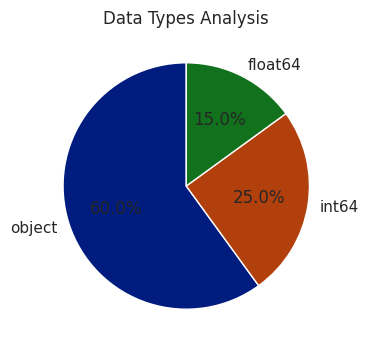

In [73]:
# Pass figsize as a tuple (width, height)
plt.figure(figsize=(6, 4))
type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90,colors=sns.color_palette('dark'))
plt.title('Data Types Analysis')
plt.ylabel('')
plt.show()

In [74]:
# Calculate missing value percentages
missing_percent = data.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print('Missing Values with Percentage')
print(missing_percent)

Missing Values with Percentage
agent     26.163874
agency    26.163281
dtype: float64


<Axes: >

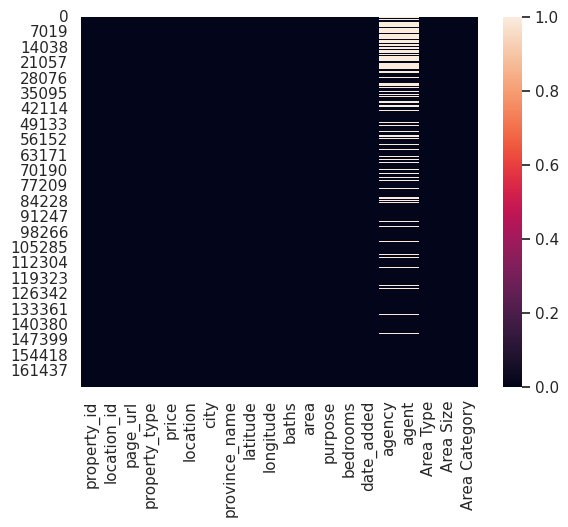

In [75]:
# Heatmap for the analysis of the Missing values
sns.heatmap(data.isnull())

In [76]:
# Droping the columns with most Missing Values
data.drop(['agent','agency'], axis=1, inplace= True)

<Axes: >

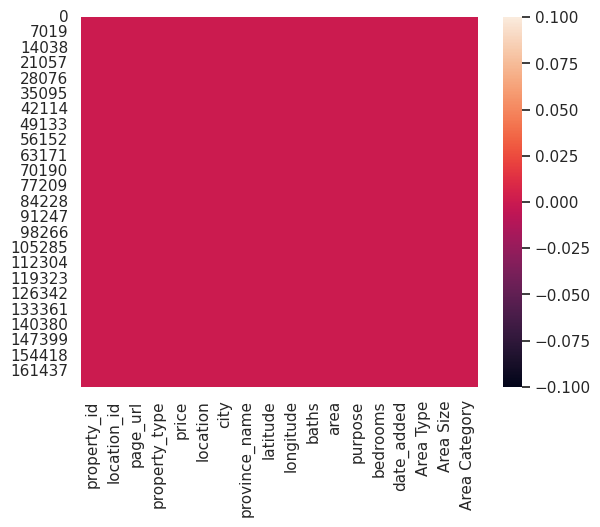

In [77]:
# Heatmap for the analysis of the Missing values
sns.heatmap(data.isnull())

In [78]:
# Columns of the Data
data.columns

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'Area Type', 'Area Size',
       'Area Category'],
      dtype='object')

In [79]:
# Statistical Data Anlysis
data.describe(include='all')

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Area Type,Area Size,Area Category
count,1.684460e+05,168446.000000,168446,168446,1.684460e+05,168446,168446,168446,168446.000000,168446.000000,168446.000000,168446,168446,168446.000000,168446,168446,168446.000000,168446
unique,NaN,NaN,168446,7,NaN,1509,5,3,NaN,NaN,NaN,344,2,NaN,124,2,NaN,22
top,NaN,NaN,https://www.zameen.com/Property/bahria_town_ka...,House,NaN,DHA Defence,Karachi,Punjab,NaN,NaN,NaN,1 Kanal,For Sale,NaN,07-03-2019,Marla,NaN,0-5 Marla
freq,NaN,NaN,1,105468,NaN,22046,60484,70536,NaN,NaN,NaN,20061,120655,NaN,9485,137769,NaN,64501
mean,1.559626e+07,4375.936395,NaN,NaN,1.776576e+07,NaN,NaN,NaN,29.859519,71.239804,2.874227,NaN,NaN,3.179422,NaN,NaN,5.892188,NaN
std,2.251207e+06,3776.561581,NaN,NaN,3.531003e+07,NaN,NaN,NaN,3.807870,3.133042,2.463400,NaN,NaN,1.971401,NaN,NaN,5.778327,NaN
min,8.657500e+04,1.000000,NaN,NaN,0.000000e+00,NaN,NaN,NaN,11.052446,25.906027,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN
25%,1.488320e+07,1058.000000,NaN,NaN,1.750000e+05,NaN,NaN,NaN,24.948536,67.130363,0.000000,NaN,NaN,2.000000,NaN,NaN,3.000000,NaN
50%,1.665851e+07,3286.000000,NaN,NaN,8.500000e+06,NaN,NaN,NaN,31.459784,73.056182,3.000000,NaN,NaN,3.000000,NaN,NaN,5.000000,NaN
75%,1.708662e+07,7220.000000,NaN,NaN,1.950000e+07,NaN,NaN,NaN,33.560887,73.259870,4.000000,NaN,NaN,4.000000,NaN,NaN,8.000000,NaN


> **Exploratory Data Analysis**


City Statistical Analysis


,city
count,168446
unique,5
top,Karachi
freq,60484


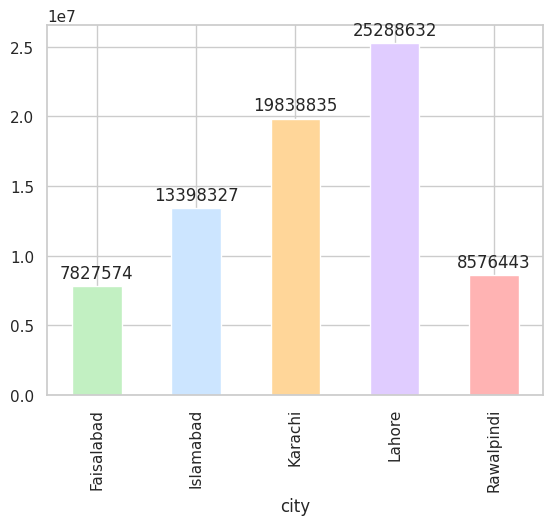

In [80]:
# Calculate average price by city
avg_prices = data.groupby('city')['price'].mean()

# Create and customize the plot
colors = ['#c2f0c2', '#cce5ff', '#ffd699', '#e0ccff', '#ffb3b3']
bars = avg_prices.plot.bar(color=colors)

# Add value labels on bars
plt.bar_label(bars.containers[0], fmt='%.0f', padding=3)

print("City Statistical Analysis")
data['city'].describe()

In [81]:
# Data purpose values counts
data.purpose.value_counts()

,count
purpose,
For Sale,120655
For Rent,47791


In [82]:
# Separate the Purpose data For Sale in Cities by Price
for_sale =data[data['purpose'] == 'For Sale'].groupby(['city'])['price'].mean()

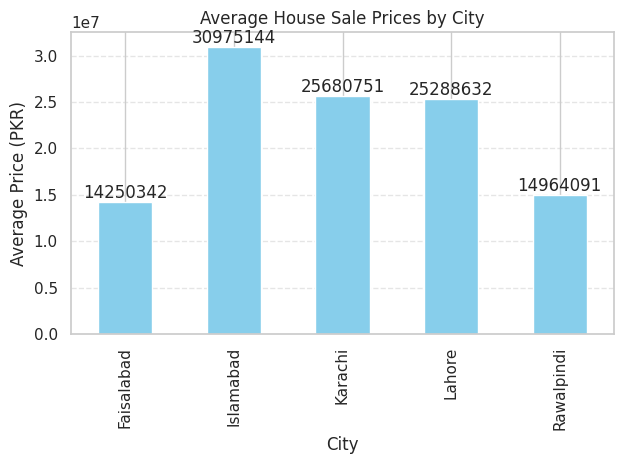

In [83]:
# Create bar plot
ax = for_sale.plot.bar(color='skyblue')

# Add value labels on bars
ax.bar_label(ax.containers[0], fmt='%.0f')

# Customize plot
plt.title("Average House Sale Prices by City")
plt.xlabel("City")
plt.ylabel("Average Price (PKR)")
plt.grid(axis='y', ls='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [84]:
# Separate the Purpose data For Rent in Cities by Price
for_rent =data[data['purpose'] == 'For Rent'].groupby(['city'])['price'].mean()

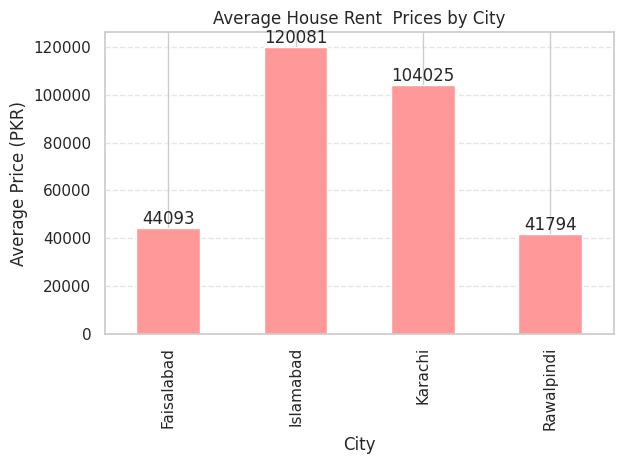

In [85]:
# Create bar plot
ax = for_rent.plot.bar(color='#ff9999')

# Add value labels on bars
ax.bar_label(ax.containers[0], fmt='%.0f')

# Customize plot
plt.title("Average House Rent  Prices by City")
plt.xlabel("City")
plt.ylabel("Average Price (PKR)")
plt.grid(axis='y', ls='--', alpha=0.5)

plt.tight_layout()
plt.show()

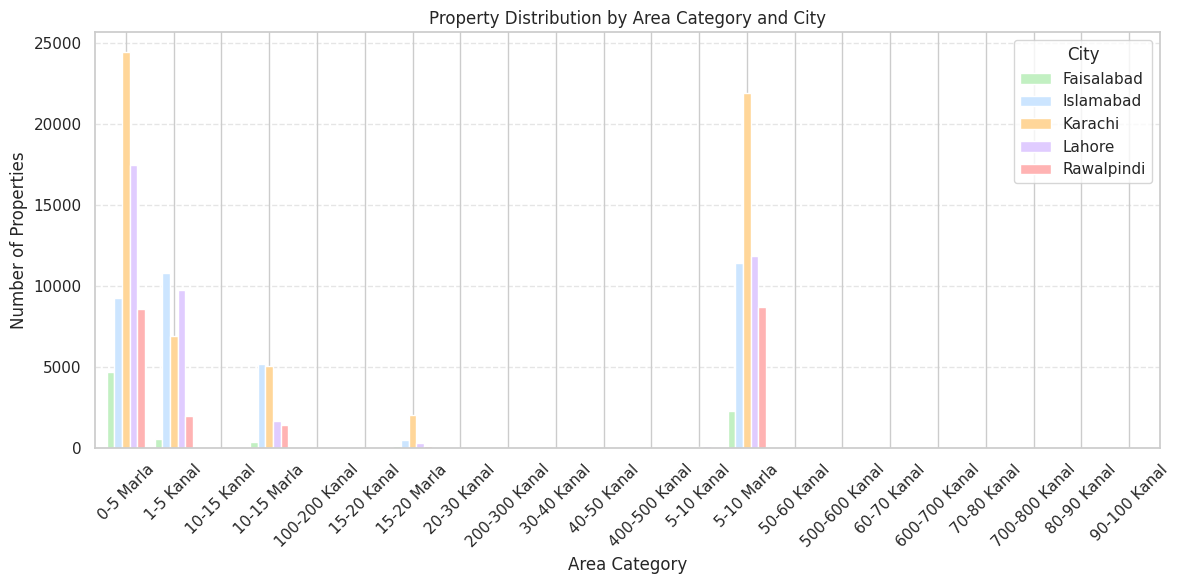

In [86]:
# Count properties by area category and city
area_counts = data.groupby(['Area Category', 'city']).size().unstack(fill_value=0)

# Plot settings
colors = ['#c2f0c2', '#cce5ff', '#ffd699', '#e0ccff', '#ffb3b3']

# Create plot
area_counts.plot(kind='bar',
                color=colors,
                figsize=(12, 6),
                width=0.8,  # Slightly thinner bars for better readability
                rot=45)     # Rotate x-labels directly in plot command

# Customize plot
plt.title("Property Distribution by Area Category and City")
plt.xlabel("Area Category")
plt.ylabel("Number of Properties")
plt.grid(axis='y', ls='--', alpha=0.5)

# Improve legend
plt.legend(title='City', bbox_to_anchor=(1, 1))  # Places legend outside plot

plt.tight_layout()
plt.show()

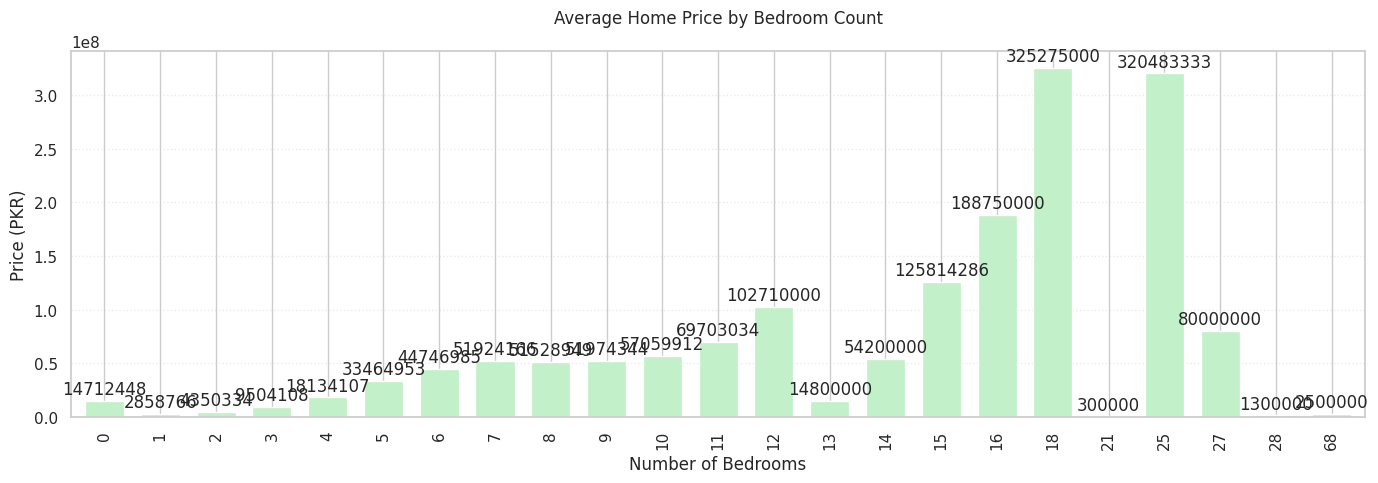

In [87]:
# Calculate average price per bedroom
avg_price = data.groupby('bedrooms')['price'].mean()

# Create plot with custom styling
ax = avg_price.plot.bar(color='#c2f0c8',  # Slightly brighter green
                       figsize=(14, 5),
                       width=0.7)

# Add value labels
ax.bar_label(ax.containers[0], fmt='%.0f', padding=2)

# Customize plot appearance
plt.title('Average Home Price by Bedroom Count', pad=20)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (PKR)')
plt.grid(axis='y', ls=':', alpha=0.4)  # Dotted grid lines

# Remove unnecessary elements
plt.legend().remove()  # Legend not needed for single series
plt.tight_layout()
plt.show()

In [88]:
# Droping the unnecessery columns
data = data.drop(columns = ['property_id','location_id','location','province_name','area','page_url','property_type','latitude','longitude','date_added','Area Category'],axis=1)

In [89]:
data.head(3)

,price,city,baths,purpose,bedrooms,Area Type,Area Size
0,10000000,Islamabad,2,For Sale,2,Marla,4.0
1,6900000,Islamabad,3,For Sale,3,Marla,5.6
2,16500000,Islamabad,6,For Sale,5,Marla,8.0


In [90]:
# Feature Selection for purpose (for_sale)
data = data[data['purpose'] == 'For Sale']

In [91]:
data.purpose.value_counts()

,count
purpose,
For Sale,120655


In [92]:
print(f'The Number of Rows in a Dataset is {data.shape[0]}')
print(f'The NUmbre of Columns in a Dataset is {data.shape[1]}')

The Number of Rows in a Dataset is 120655
The NUmbre of Columns in a Dataset is 7


In [93]:
# Converting property area measurements into a standardized unit (square feet)
# Converts directly from Marla to sqft (1 Marla = 272.25 sqft in Pakistan)
# First converts Kanal to Marla (1 Kanal = 20 Marla)
data['total_sqft'] = data.apply(
    lambda x: x['Area Size']*272.25 if x['Area Type'] == 'Marla'
    else x['Area Size']*20*272.25,
    axis=1
)

In [94]:
# Price per square foot for each property in your dataset
# Computes price / total_sqft to get the price per sqft.
data['price_per_sqft'] = data.apply(
    lambda x: x['price'] / x['total_sqft'] if x['total_sqft'] > 0 else 0,
    axis=1
)

In [95]:
# Data Ovwerview
data.head(3)

,price,city,baths,purpose,bedrooms,Area Type,Area Size,total_sqft,price_per_sqft
0,10000000,Islamabad,2,For Sale,2,Marla,4.0,1089.0,9182.736455
1,6900000,Islamabad,3,For Sale,3,Marla,5.6,1524.6,4525.777253
2,16500000,Islamabad,6,For Sale,5,Marla,8.0,2178.0,7575.757576


In [96]:
# Statistical Analysis of the data
data.describe(include='all')

,price,city,baths,purpose,bedrooms,Area Type,Area Size,total_sqft,price_per_sqft
count,1.206550e+05,120655,120655.000000,120655,120655.000000,120655,120655.000000,1.206550e+05,1.206550e+05
unique,NaN,5,NaN,1,NaN,2,NaN,NaN,NaN
top,NaN,Karachi,NaN,For Sale,NaN,Marla,NaN,NaN,NaN
freq,NaN,46669,NaN,120655,NaN,102158,NaN,NaN,NaN
mean,2.476513e+07,NaN,3.085948,NaN,3.401384,NaN,5.843227,3.012505e+03,8.499383e+03
std,3.959754e+07,NaN,2.560652,NaN,1.928359,NaN,4.554540,1.621533e+04,1.970609e+04
min,0.000000e+00,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000e+00,0.000000e+00
25%,7.400000e+06,NaN,1.000000,NaN,2.000000,NaN,3.000000,1.306800e+03,5.426162e+03
50%,1.350000e+07,NaN,3.000000,NaN,3.000000,NaN,5.000000,1.742400e+03,7.346189e+03
75%,2.600000e+07,NaN,5.000000,NaN,5.000000,NaN,8.000000,2.722500e+03,9.843893e+03


In [97]:
# Values Counts of the baths in dataset
data.baths.value_counts().sort_index(ascending=True)

,count
baths,
0,27554
1,3431
2,17030
3,23460
4,14871
5,12816
6,14196
7,4628
8,1656


In [98]:
# Values Counts of Besrooms in Dataset
data.bedrooms.value_counts().sort_index(ascending=True)

,count
bedrooms,
0,13119
1,2691
2,19713
3,31634
4,18665
5,20201
6,9713
7,2419
8,1164


In [99]:
# | (pipe operator):Combines the conditions with a logical OR (selects rows where either condition is true)
# Thus, it selects rows where either bedrooms or baths are 0.
data[((data['bedrooms'] == 0) | (data['baths'] == 0))]

,price,city,baths,purpose,bedrooms,Area Type,Area Size,total_sqft,price_per_sqft
12,400000000,Islamabad,0,For Sale,0,Kanal,4.5,24502.500,16324.864810
19,1750000,Islamabad,0,For Sale,0,Marla,1.5,408.375,4285.277013
47,220000000,Lahore,0,For Sale,0,Kanal,6.0,32670.000,6734.006734
49,9500000,Lahore,0,For Sale,3,Marla,9.0,2450.250,3877.155392
54,32500000,Lahore,0,For Sale,5,Kanal,1.0,5445.000,5968.778696
...,...,...,...,...,...,...,...,...,...
168440,4800000,Karachi,0,For Sale,2,Marla,3.8,1034.550,4639.698420
168441,26500000,Karachi,0,For Sale,6,Marla,9.6,2613.600,10139.271503
168442,12500000,Karachi,0,For Sale,3,Marla,8.0,2178.000,5739.210285
168443,27000000,Karachi,0,For Sale,6,Marla,9.6,2613.600,10330.578512


In [100]:
# | (pipe operator): Combines conditions with a logical OR (selects rows where either is true).
# ~ (Tilde Operator): Acts as a logical NOT, inverting the condition.
# Thus, it selects rows where neither bedrooms nor baths are 0.
data = data[~((data['bedrooms'] == 0) | (data['baths'] == 0))]

In [101]:
print(f'The Number of Rows in a Dataset is {data.shape[0]}')
print(f'The NUmbre of Columns in a Dataset is {data.shape[1]}')

The Number of Rows in a Dataset is 92767
The NUmbre of Columns in a Dataset is 9


In [102]:
data.head()

,price,city,baths,purpose,bedrooms,Area Type,Area Size,total_sqft,price_per_sqft
0,10000000,Islamabad,2,For Sale,2,Marla,4.0,1089.0,9182.736455
1,6900000,Islamabad,3,For Sale,3,Marla,5.6,1524.6,4525.777253
2,16500000,Islamabad,6,For Sale,5,Marla,8.0,2178.0,7575.757576
3,43500000,Islamabad,4,For Sale,4,Kanal,2.0,10890.0,3994.490358
4,7000000,Islamabad,3,For Sale,3,Marla,8.0,2178.0,3213.957759


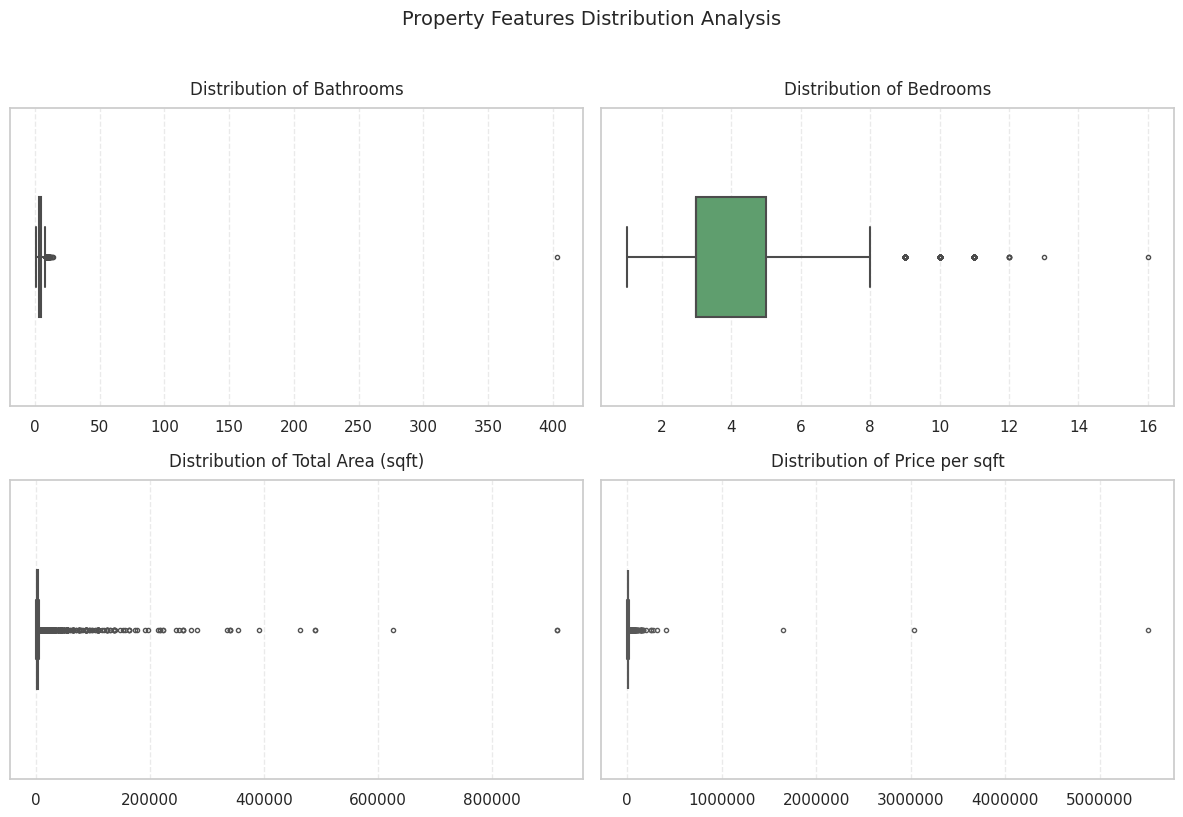

In [103]:
# Define targets and colors
targets = ['baths', 'bedrooms', 'total_sqft', 'price_per_sqft']
titles = ['Bathrooms', 'Bedrooms', 'Total Area (sqft)', 'Price per sqft']
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']  # Colorblind-friendly palette

# Create figure with subplots
plt.figure(figsize=(12, 8))

for i, (target, title) in enumerate(zip(targets, titles)):
    plt.subplot(2, 2, i+1)

    # Create boxplot with improved styling
    sns.boxplot(x=data[target], color=colors[i],
                width=0.4, linewidth=1.5, fliersize=3)

    # Add proper titles and labels
    plt.title(f'Distribution of {title}', fontsize=12, pad=10)
    plt.xlabel('')

    # Format axis for large numbers
    if target in ['total_sqft', 'price_per_sqft']:
        plt.ticklabel_format(style='plain', axis='x')

    # Add grid for better readability
    plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.suptitle('Property Features Distribution Analysis', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

In [104]:
# Define numerical features to process
features = ['baths', 'bedrooms', 'total_sqft', 'price_per_sqft']



def winsorize_outliers(series):
    """Cap outliers using 1.5*IQR rule"""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ensure bounds are physically meaningful (no negative values for these features)
    lower_bound = max(lower_bound, 0) if series.name in ['baths', 'bedrooms', 'total_sqft', 'price_per_sqft'] else lower_bound

    return series.clip(lower_bound, upper_bound)

# Apply outlier treatment to all specified features
data[features] = data[features].apply(winsorize_outliers)

# Optional: Track how many values were modified
for feature in features:
    n_outliers = ((data[feature] < data[feature].min()) |
                 (data[feature] > data[feature].max())).sum()
    print(f"{feature}: {n_outliers} outliers treated")

baths: 0 outliers treated
bedrooms: 0 outliers treated
total_sqft: 0 outliers treated
price_per_sqft: 0 outliers treated


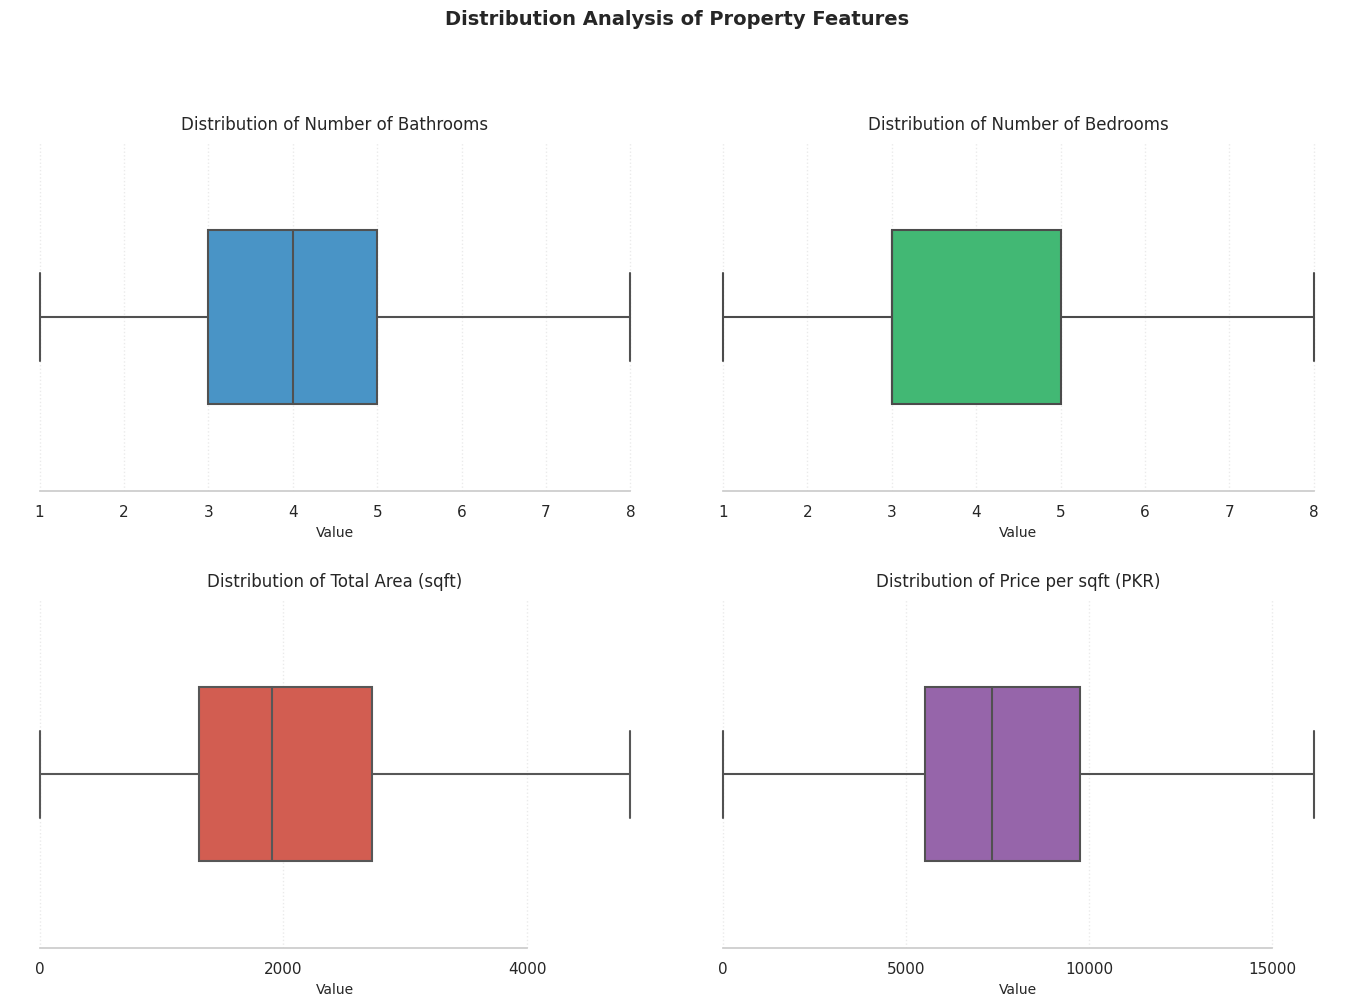

In [105]:
# Define targets and corresponding display names
targets = ['baths', 'bedrooms', 'total_sqft', 'price_per_sqft']
display_names = ['Number of Bathrooms', 'Number of Bedrooms',
                 'Total Area (sqft)', 'Price per sqft (PKR)']
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']  # Modern color palette

# Create figure with proper layout
plt.figure(figsize=(14, 10))
plt.suptitle('Distribution Analysis of Property Features',
             y=1.02, fontsize=14, fontweight='bold')

for i, (target, name) in enumerate(zip(targets, display_names)):
    plt.subplot(2, 2, i+1)  # Fixed to 2x2 grid (matches 4 targets)

    # Create styled boxplot
    box = sns.boxplot(x=data[target], color=colors[i], width=0.5,
                     linewidth=1.5, flierprops={'marker': 'o', 'markersize': 4})

    # Add titles and labels
    plt.title(f'Distribution of {name}', pad=10, fontsize=12)
    plt.xlabel('Value', fontsize=10)

    # Format large numbers properly
    if target in ['total_sqft', 'price_per_sqft']:
        plt.ticklabel_format(style='plain', axis='x')
        plt.locator_params(axis='x', nbins=5)  # Limit number of x-ticks

    # Add grid and adjust spines
    plt.grid(axis='x', linestyle=':', alpha=0.4)
    sns.despine(trim=True)

plt.tight_layout(pad=2.0)  # Add padding between subplots
plt.show()

In [106]:
# statistcal analysis of price in the data
data['price'].describe()

,price
count,9.276700e+04
mean,2.444163e+07
std,3.694130e+07
min,1.000000e+00
25%,7.500000e+06
50%,1.400000e+07
75%,2.600000e+07
max,2.000000e+09


In [107]:
def remove_price_per_sqft_outliers(df, city_col='city', pps_col='price_per_sqft', n_sigma=1):
    """
    Remove outliers in price-per-sqft within each city group using standard deviation.

    Parameters:
    - df: Input DataFrame
    - city_col: Column name containing city information
    - pps_col: Column name containing price-per-sqft values
    - n_sigma: Number of standard deviations to keep (default: ±1σ)

    Returns:
    - DataFrame with outliers removed
    """
    def filter_group(group):
        mean = group[pps_col].mean()
        std = group[pps_col].std()
        lower_bound = mean - n_sigma * std
        upper_bound = mean + n_sigma * std
        return group[(group[pps_col] >= lower_bound) &
                    (group[pps_col] <= upper_bound)]

    # Group by city and filter each group
    filtered_groups = df.groupby(city_col, group_keys=False).apply(filter_group)

    return filtered_groups.reset_index(drop=True)

# Usage
data = remove_price_per_sqft_outliers(data, n_sigma=1)

In [108]:
data.price_per_sqft.describe()

,price_per_sqft
count,63870.000000
mean,7455.968266
std,1894.853724
min,3784.400479
25%,5996.889114
50%,7346.189164
75%,8815.426997
max,12488.521579


In [109]:
# Data Overview
data.head()

,price,city,baths,purpose,bedrooms,Area Type,Area Size,total_sqft,price_per_sqft
0,8500000,Faisalabad,5,For Sale,4,Marla,5.0,1361.250,6244.260790
1,6000000,Faisalabad,2,For Sale,4,Marla,2.5,680.625,8815.426997
2,60000000,Faisalabad,6,For Sale,6,Kanal,1.6,4846.050,6887.052342
3,8500000,Faisalabad,3,For Sale,4,Marla,5.0,1361.250,6244.260790
4,8900000,Faisalabad,5,For Sale,4,Marla,5.0,1361.250,6538.108356


In [110]:
data[data.total_sqft/data.bedrooms<100].head()

,price,city,baths,purpose,bedrooms,Area Type,Area Size,total_sqft,price_per_sqft
1298,3100000,Faisalabad,3,For Sale,6,Marla,2.0,544.50,5693.296602
8017,1650000,Islamabad,2,For Sale,3,Marla,1.0,272.25,6060.606061
10995,4200000,Karachi,6,For Sale,8,Marla,2.4,653.40,6427.915519
12197,2500000,Karachi,2,For Sale,5,Marla,1.6,435.60,5739.210285
14662,5600000,Karachi,5,For Sale,8,Marla,2.4,653.40,8570.554025


In [111]:
# Checking the Shape of the data
data.shape

(63870, 9)

In [112]:
data[~(data.total_sqft/data.bedrooms<100)]

,price,city,baths,purpose,bedrooms,Area Type,Area Size,total_sqft,price_per_sqft
0,8500000,Faisalabad,5,For Sale,4,Marla,5.0,1361.250,6244.260790
1,6000000,Faisalabad,2,For Sale,4,Marla,2.5,680.625,8815.426997
2,60000000,Faisalabad,6,For Sale,6,Kanal,1.6,4846.050,6887.052342
3,8500000,Faisalabad,3,For Sale,4,Marla,5.0,1361.250,6244.260790
4,8900000,Faisalabad,5,For Sale,4,Marla,5.0,1361.250,6538.108356
...,...,...,...,...,...,...,...,...,...
63865,9849000,Rawalpindi,3,For Sale,3,Marla,5.0,1361.250,7235.261708
63866,6200000,Rawalpindi,2,For Sale,2,Marla,4.2,1143.450,5422.187240
63867,13500000,Rawalpindi,6,For Sale,5,Marla,7.0,1905.750,7083.825266
63868,10000000,Rawalpindi,4,For Sale,3,Marla,5.0,1361.250,7346.189164


In [113]:
def plot_property_scatter(df, location, bedrooms=(2, 3), figsize=(8, 6)):
    """
    Plot a scatter chart comparing property prices by size for different bedroom counts.

    Parameters:
    - df: DataFrame containing property data
    - location: City name to filter by
    - bedrooms: Tuple of bedroom counts to compare (default: 2 and 3)
    - figsize: Figure dimensions (default: (15, 10))
    """
    plt.figure(figsize=figsize)

    # Define styles for each bedroom type
    styles = {
        2: {'color': 'blue', 'label': '2 Bedrooms', 'marker': 'o'},
        3: {'color': 'green', 'label': '3 Bedrooms', 'marker': '+'}
    }

    for beds in bedrooms:
        subset = df[(df.city == location) & (df.bedrooms == beds)]
        plt.scatter(subset.total_sqft, subset.price,
                   s=50, alpha=0.7,
                   **styles.get(beds, {'color': 'gray', 'label': f'{beds} Bedrooms'}))

    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.xlabel("Total Square Feet Area", fontsize=12)
    plt.ylabel("Price (PKR)", fontsize=12)
    plt.title(f"Property Prices in {location}", fontsize=14, pad=20)
    plt.legend()
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()

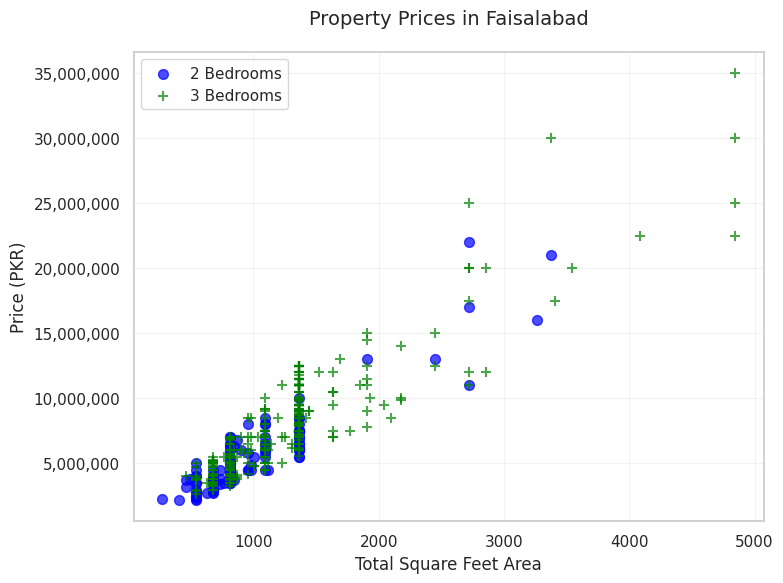

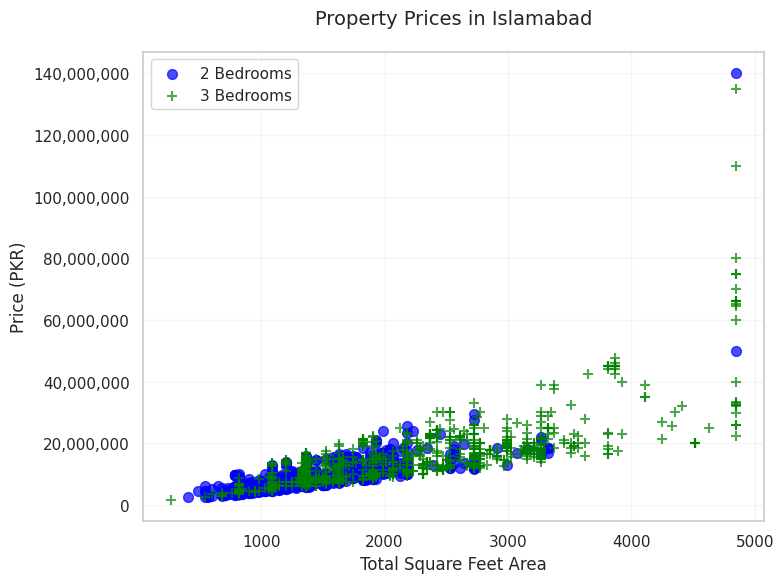

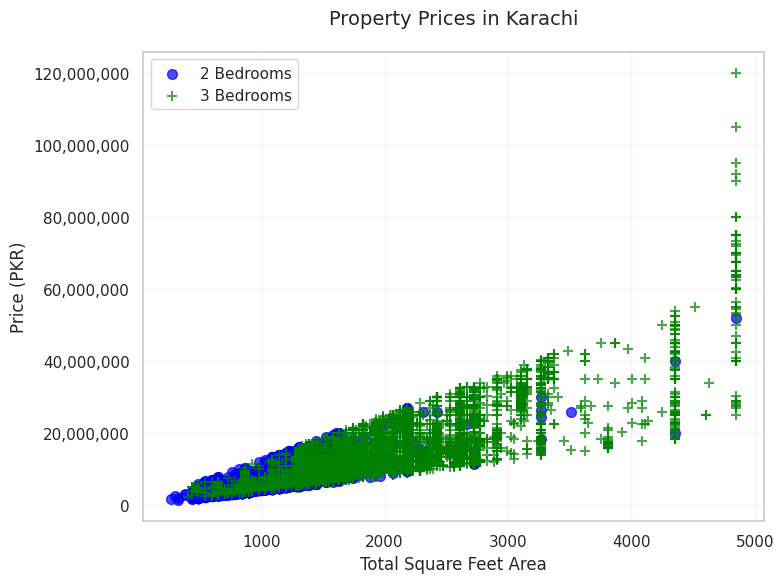

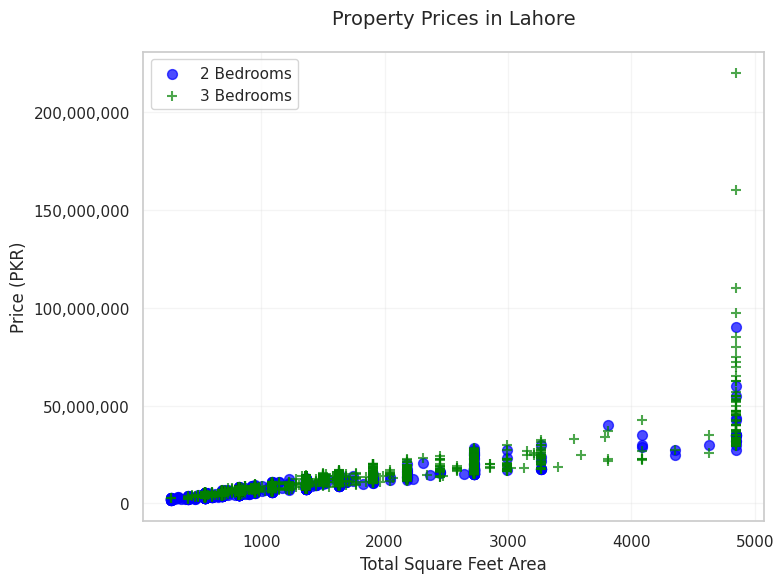

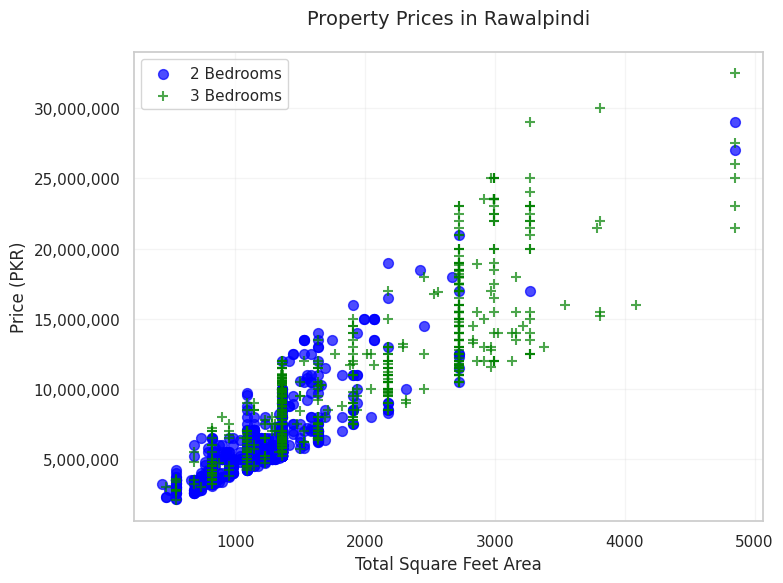

In [114]:
for i in data.city.unique():
    plot_property_scatter(data,i)

In [115]:
def remove_bedroom_outliers(df, city_col='city', bedroom_col='bedrooms', price_pps_col='price_per_sqft'):
    """
    Remove properties where the price_per_sqft is lower than the mean of
    properties with one less bedroom in the same city (if statistically significant).

    Parameters:
    - df: Input DataFrame
    - city_col: Column name for city
    - bedroom_col: Column name for bedroom count
    - price_pps_col: Column name for price per sqft

    Returns:
    - DataFrame with outliers removed
    """
    # Pre-compute statistics for each city-bedroom combination
    stats = df.groupby([city_col, bedroom_col])[price_pps_col].agg(['mean', 'std', 'count'])

    # Identify indices to exclude
    exclude_indices = []

    for (city, bedrooms), group_df in df.groupby([city_col, bedroom_col]):
        lower_bed_stats = stats.loc[(city, bedrooms-1)] if (city, bedrooms-1) in stats.index else None

        # Only compare if lower bedroom group exists and has sufficient samples
        if lower_bed_stats is not None and lower_bed_stats['count'] > 5:
            # Find properties with pps lower than the mean of one-less-bedroom group
            mask = group_df[price_pps_col] < lower_bed_stats['mean']
            exclude_indices.extend(group_df[mask].index.tolist())

    # Return cleaned dataframe (original if no indices to exclude)
    return df.drop(exclude_indices) if exclude_indices else df.copy()

# Usage
remove_bedroom_outliers(data)

,price,city,baths,purpose,bedrooms,Area Type,Area Size,total_sqft,price_per_sqft
1,6000000,Faisalabad,2,For Sale,4,Marla,2.5,680.625,8815.426997
2,60000000,Faisalabad,6,For Sale,6,Kanal,1.6,4846.050,6887.052342
4,8900000,Faisalabad,5,For Sale,4,Marla,5.0,1361.250,6538.108356
8,13000000,Faisalabad,3,For Sale,4,Marla,7.0,1905.750,6821.461367
9,5000000,Faisalabad,2,For Sale,3,Marla,3.0,816.750,6121.824304
...,...,...,...,...,...,...,...,...,...
63862,20000000,Rawalpindi,7,For Sale,5,Marla,10.0,2722.500,7346.189164
63865,9849000,Rawalpindi,3,For Sale,3,Marla,5.0,1361.250,7235.261708
63867,13500000,Rawalpindi,6,For Sale,5,Marla,7.0,1905.750,7083.825266
63868,10000000,Rawalpindi,4,For Sale,3,Marla,5.0,1361.250,7346.189164


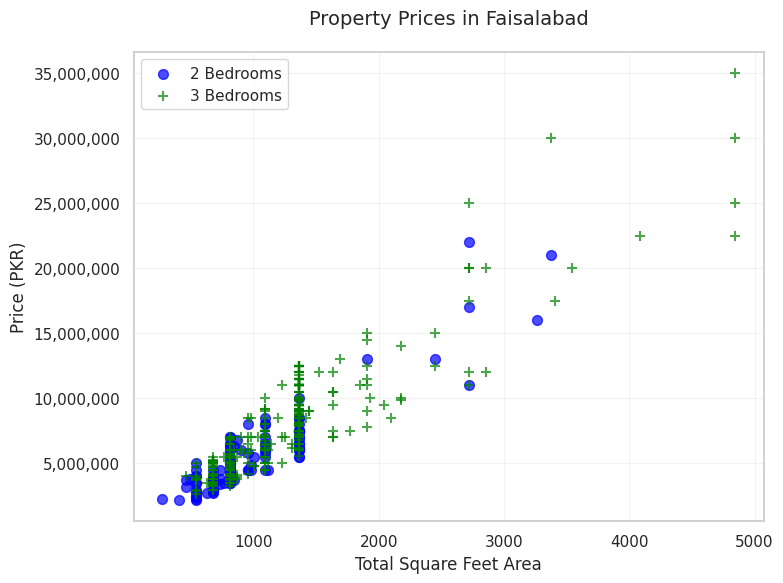

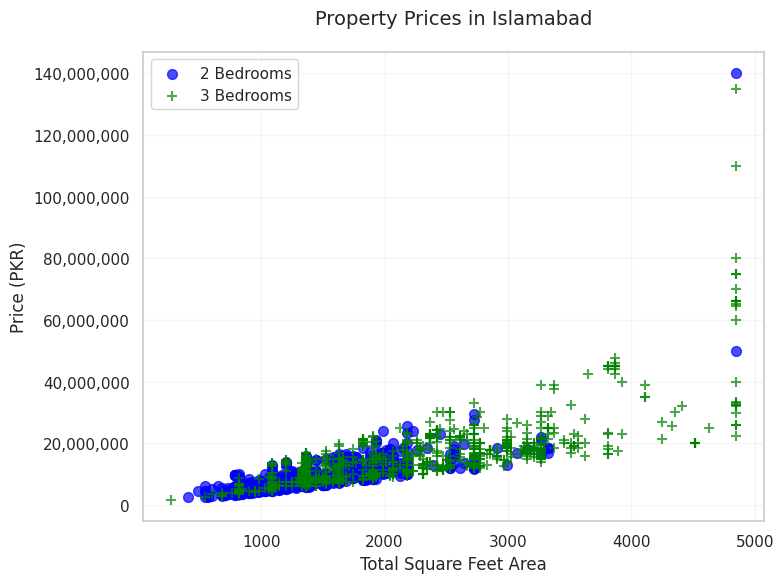

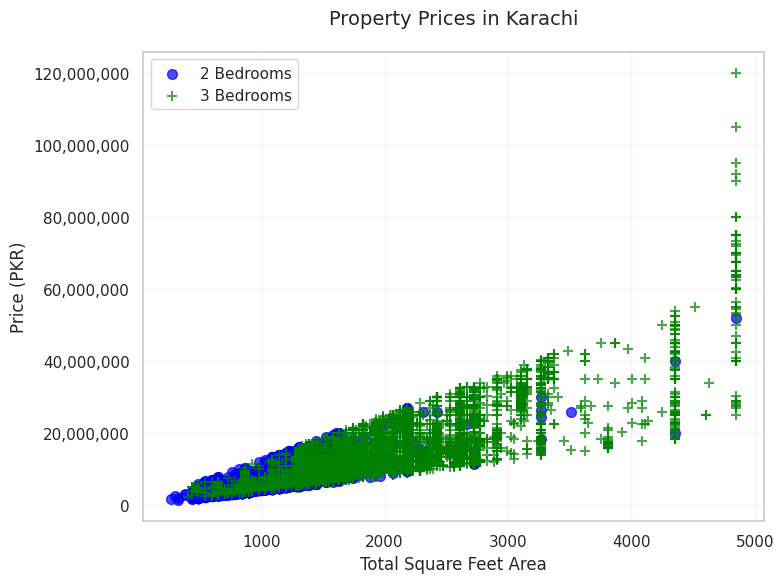

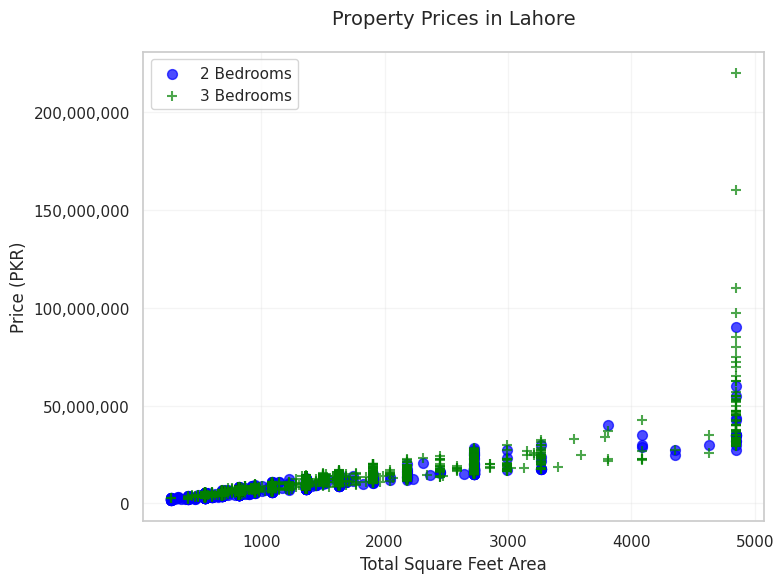

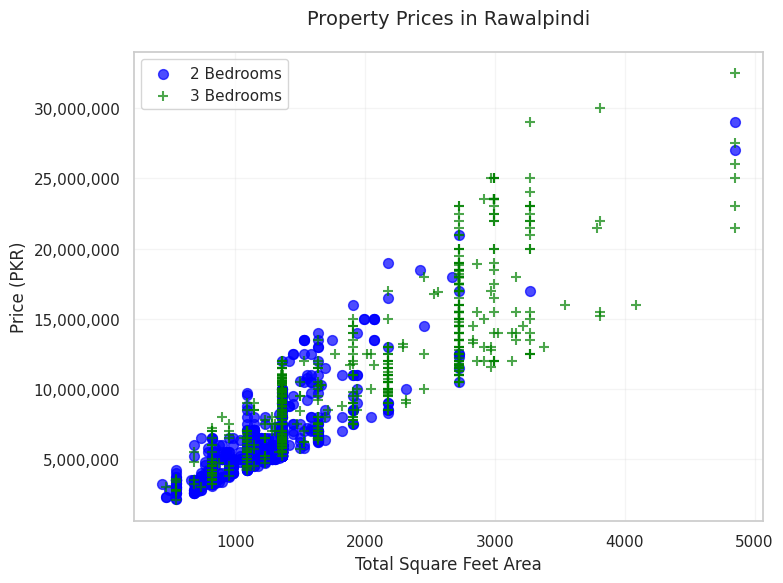

In [116]:
# Visualizing the data after removing outliers
for i in data.city.unique():
    plot_property_scatter(data,i)

In [117]:
# data overview
data.head()

,price,city,baths,purpose,bedrooms,Area Type,Area Size,total_sqft,price_per_sqft
0,8500000,Faisalabad,5,For Sale,4,Marla,5.0,1361.250,6244.260790
1,6000000,Faisalabad,2,For Sale,4,Marla,2.5,680.625,8815.426997
2,60000000,Faisalabad,6,For Sale,6,Kanal,1.6,4846.050,6887.052342
3,8500000,Faisalabad,3,For Sale,4,Marla,5.0,1361.250,6244.260790
4,8900000,Faisalabad,5,For Sale,4,Marla,5.0,1361.250,6538.108356


In [118]:
# Unique Values of the bath
data.baths.unique()

array([5, 2, 6, 3, 4, 8, 7, 1])

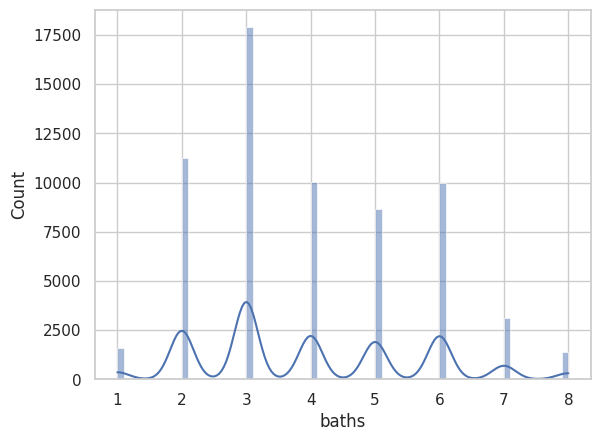

In [119]:
# histoplot for baths
sns.histplot(data.baths,kde=True)
plt.show()

In [120]:
data[data.baths>data.bedrooms+2]

,price,city,baths,purpose,bedrooms,Area Type,Area Size,total_sqft,price_per_sqft
18,7200000,Faisalabad,6,For Sale,3,Marla,5.0,1361.25,5289.256198
23,9000000,Faisalabad,7,For Sale,4,Marla,5.0,1361.25,6611.570248
42,16000000,Faisalabad,7,For Sale,4,Marla,8.0,2178.00,7346.189164
118,6000000,Faisalabad,6,For Sale,3,Marla,5.0,1361.25,4407.713499
523,25000000,Faisalabad,8,For Sale,5,Marla,15.0,4083.75,6121.824304
...,...,...,...,...,...,...,...,...,...
60270,8000000,Rawalpindi,7,For Sale,4,Marla,7.0,1905.75,4197.822380
60420,20000000,Rawalpindi,7,For Sale,4,Marla,10.0,2722.50,7346.189164
60944,45000000,Rawalpindi,8,For Sale,5,Kanal,1.0,4846.05,8264.462810
61483,12000000,Rawalpindi,8,For Sale,4,Marla,7.0,1905.75,6296.733569


In [121]:
data[data.baths<data.bedrooms+2]

,price,city,baths,purpose,bedrooms,Area Type,Area Size,total_sqft,price_per_sqft
0,8500000,Faisalabad,5,For Sale,4,Marla,5.0,1361.250,6244.260790
1,6000000,Faisalabad,2,For Sale,4,Marla,2.5,680.625,8815.426997
2,60000000,Faisalabad,6,For Sale,6,Kanal,1.6,4846.050,6887.052342
3,8500000,Faisalabad,3,For Sale,4,Marla,5.0,1361.250,6244.260790
4,8900000,Faisalabad,5,For Sale,4,Marla,5.0,1361.250,6538.108356
...,...,...,...,...,...,...,...,...,...
63865,9849000,Rawalpindi,3,For Sale,3,Marla,5.0,1361.250,7235.261708
63866,6200000,Rawalpindi,2,For Sale,2,Marla,4.2,1143.450,5422.187240
63867,13500000,Rawalpindi,6,For Sale,5,Marla,7.0,1905.750,7083.825266
63868,10000000,Rawalpindi,4,For Sale,3,Marla,5.0,1361.250,7346.189164


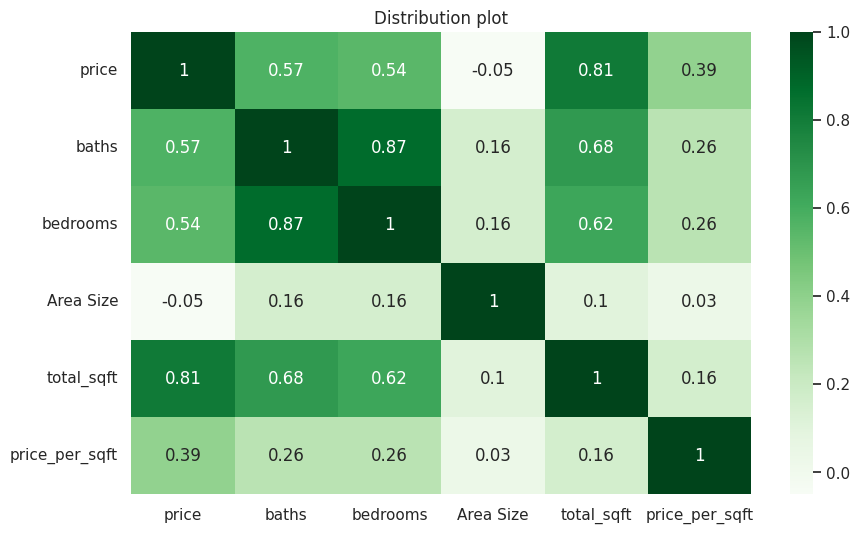

In [122]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='Greens')
plt.title('Distribution plot')
plt.show()

In [123]:
# data columns
data.columns

Index(['price', 'city', 'baths', 'purpose', 'bedrooms', 'Area Type',
       'Area Size', 'total_sqft', 'price_per_sqft'],
      dtype='object')

In [124]:
data = data.drop(columns=['purpose','Area Size','Area Type','price_per_sqft'],axis=1)

In [125]:
# City column with Dummies
city_dummies = pd.get_dummies(data['city']).astype('int64')    # Explicit conversion for consistency
# Display the first 5 rows (with improved formatting)
city_dummies.head()

,Faisalabad,Islamabad,Karachi,Lahore,Rawalpindi
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [126]:
data= pd.concat([city_dummies,data.drop(columns=['city'],axis=1)],axis=1)

In [127]:
data.head()

,Faisalabad,Islamabad,Karachi,Lahore,Rawalpindi,price,baths,bedrooms,total_sqft
0,1,0,0,0,0,8500000,5,4,1361.250
1,1,0,0,0,0,6000000,2,4,680.625
2,1,0,0,0,0,60000000,6,6,4846.050
3,1,0,0,0,0,8500000,3,4,1361.250
4,1,0,0,0,0,8900000,5,4,1361.250


In [128]:
data.shape

(63870, 9)

In [129]:
# splitting the data
x = data.drop(columns = 'price',axis=1)
y =data['price']

In [148]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check the shapes to confirm consistency before fitting
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (51096, 8)
Shape of y_train: (51096,)
Shape of x_test: (12774, 8)
Shape of y_test: (12774,)


In [140]:
# Model EValuation
def evaluate_model(model, X_test, y_test):
    """
    Evaluate the performance of a regression model.

    Parameters:
    model -- trained regression model
    X_test -- test features
    y_test -- test target values

    Returns:
    None (prints evaluation metrics)
    """
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred) * 100  # as percentage

    # Print metrics
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R²): {r2:.2f}%")

    # Return metrics as dictionary if needed
    return {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2
    }

In [142]:
# Linear Regression
lr =LinearRegression(positive=True)

In [143]:
# Fitting the model
lr.fit(x_train,y_train)

LinearRegression(positive=True)

In [144]:
# Predicting the model
y_pred = lr.predict(x_test)

In [145]:
# Run Evaluation
evaluate_model(lr, x_test, y_test)

test_mse_lr = mean_squared_error(y_test, y_pred)
test_r2_lr = r2_score(y_test, y_pred) * 100

print(f"Test MSE: {test_mse_lr}")
print(f"Test R-squared: {test_r2_lr}")

Mean Squared Error (MSE): 92935921457893.0625
Root Mean Squared Error (RMSE): 9640327.8709
Mean Absolute Error (MAE): 4489206.8983
R-squared (R²): 66.78%
Test MSE: 92935921457893.06
Test R-squared: 66.77716057718786


In [146]:
# Define ElasticNet model
ELASTIC = ElasticNet()

# Hyperparameter grid for ElasticNet
elastic_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Mix between L1 and L2 regularization
}

# GridSearch with CV for ElasticNet
elastic_grid_search = GridSearchCV(ELASTIC, elastic_param_grid, cv=5, scoring='neg_mean_squared_error')
elastic_grid_search.fit(x_train, y_train)

# Best ElasticNet model
best_elastic = elastic_grid_search.best_estimator_

print("\nElasticNet Results:")
print(f"Best parameters: {elastic_grid_search.best_params_}")
print(f"Best CV score (negative MSE): {elastic_grid_search.best_score_}")

# Predict and evaluate on test set
y_pred = best_elastic.predict(x_test)

# Evaluation
evaluate_model(best_elastic, x_test, y_test)

test_mse_elastic = mean_squared_error(y_test, y_pred)
test_r2_elastic = r2_score(y_test, y_pred) * 100

print(f"Test MSE: {test_mse_elastic}")
print(f"Test R-squared: {test_r2_elastic}")


ElasticNet Results:
Best parameters: {'alpha': 0.001, 'l1_ratio': 0.5}
Best CV score (negative MSE): -96221378572458.94
Mean Squared Error (MSE): 92901334228972.9688
Root Mean Squared Error (RMSE): 9638533.8215
Mean Absolute Error (MAE): 4491578.9867
R-squared (R²): 66.79%
Test MSE: 92901334228972.97
Test R-squared: 66.78952485931329


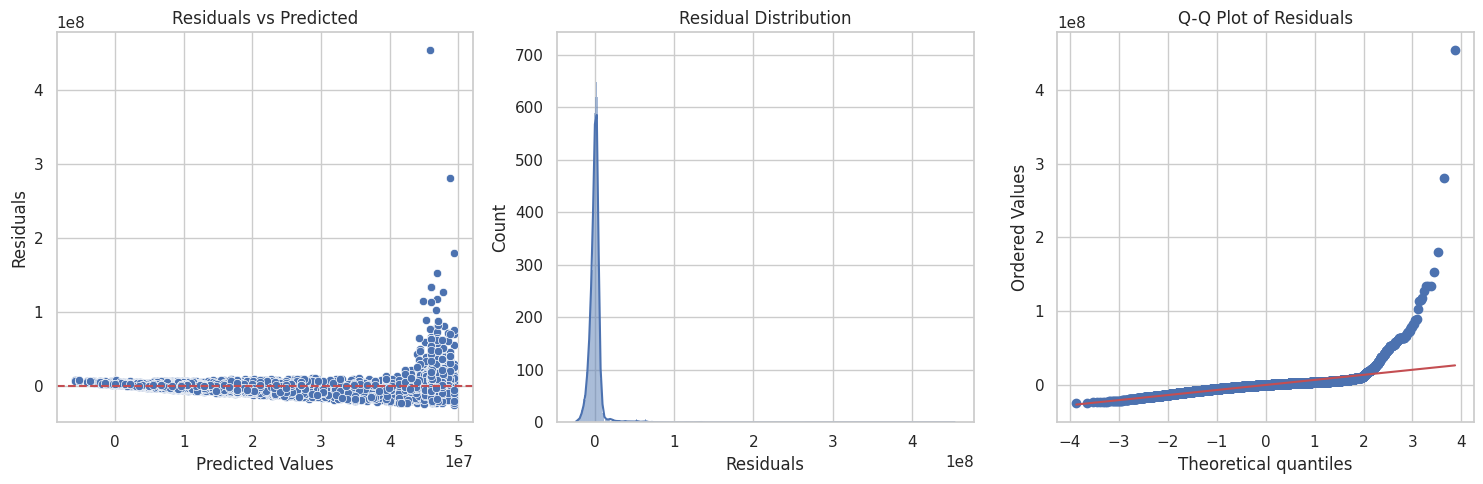

In [147]:
def plot_residual_analysis(y_true, y_pred):
    """Plot residual analysis for regression model"""
    residuals = y_true - y_pred

    plt.figure(figsize=(15, 5))

    # Residuals vs Predicted
    plt.subplot(1, 3, 1)
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted')

    # Residual distribution
    plt.subplot(1, 3, 2)
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title('Residual Distribution')

    # Q-Q plot of residuals
    plt.subplot(1, 3, 3)
    stats.probplot(residuals, plot=plt)
    plt.title('Q-Q Plot of Residuals')

    plt.tight_layout()
    plt.show()
plot_residual_analysis(y_test,y_pred)

In [160]:
def predict_price(city,sqft,bath,bed):
    city_index = np.where(x.columns==city)[0][0]

    input_data = np.zeros(len(x.columns))
    input_data[0] = sqft
    input_data[1] = bath
    input_data[2] = bed
    if city_index >= 0:
        input_data[city_index] = 1

    return lr.predict([input_data])[0]

In [161]:
predict_price('Karachi',100,3,4)

np.float64(171173268.26415128)

In [162]:
predict_price('Lahore',100,3,4)

np.float64(186658567.0648518)